<a href="https://colab.research.google.com/github/R0berth456/ExamenIIB/blob/main/ExamenIIB_Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Raices

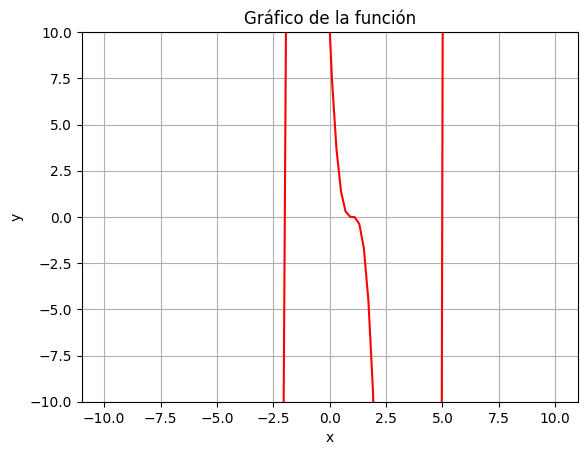

La raíz de la función es: (-2.0,       converged: True
           flag: converged
 function_calls: 13
     iterations: 12
           root: -2.0
         method: secant)
La raíz 1 de la función es: -2.0000000000004547
La raíz 2 de la función es: 1.0000038146972656
La raíz 3 de la función es: 5.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def funcion(x):
  return x**5-6*x**4+2*x**3+20*x**2-27*x+10

xs = np.linspace(-10, 10, 100)

ys = funcion(xs)

plt.plot(xs, ys, color='red')
plt.ylim(-10, 10)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la función')
plt.show()

raiz1 = optimize.bisect(funcion, -2.5, -1)
raiz2 = optimize.bisect(funcion, 0, 2.5)
raiz3 = optimize.bisect(funcion, 2.5, 7.5)
raiz = optimize.newton(funcion, -5, full_output=True)

print("La raíz de la función es:", raiz)
print("La raíz 1 de la función es:", raiz1)
print("La raíz 2 de la función es:", raiz2)
print("La raíz 3 de la función es:", raiz3)

3. Interpolacion

In [26]:
def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    """Resuelve un sistema de ecuaciones lineales mediante el método de eliminación gaussiana.

    ## Parameters

    ``A``: matriz aumentada del sistema de ecuaciones lineales. Debe ser de tamaño n-by-(n+1), donde n es el número de incógnitas.

    ## Return

    ``solucion``: vector con la solución del sistema de ecuaciones lineales.

    """
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    return solucion


In [27]:
# -*- coding: utf-8 -*-


"""
Python 3
17 / 07 / 2024
@author: z_tjona

"I find that I don't understand things unless I try to program them."
-Donald E. Knuth
"""


# ----------------------------- logging --------------------------
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

from typing import Callable



# ####################################################################
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> None:
    """Resuelve el sistema de ecuaciones para encontrar los parámetros del método de mínimos cuadrados. Plantea el sistema de ecuaciones lineales al reemplazar los valores de ``xs`` y ``ys`` en las derivadas parciales.

    ## Parameters

    ``xs``: lista con los valores de x.

    ``ys``: lista con los valores de y.

    ``fcn``: función que se ajustará a los datos.

    ``gradiente``: lista con las funciones de derivadas parciales de ``fcn``.
    [IMPORTANTE] Cada función debe ser de la forma ``der_parcial(xi, yi)->``.

    ## Return

    ``a``:

    """

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    return eliminacion_gaussiana(Ab)

In [29]:
# Derivadas parciales
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_0 = sum(xs)
    c_ind = sum([x*y for x, y in zip(xs, ys)])
    c_1 = sum([x**2 for x in xs])


    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


In [35]:
def der_parcial_0_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_ind = sum([x**2*y for x, y in zip(xs, ys)])
    c_0 = sum([x**4 for x in xs])
    c_1 = sum([x**3 for x in xs])
    c_2 = sum([x**2 for x in xs])


    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_1_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_2``: coeficiente del parámetro 2.

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_ind = sum([y * x for x, y in zip(xs, ys)])
    c_0 = sum([x**3 for x in xs])
    c_1 = sum([x**2 for x in xs])
    c_2 = sum(xs)


    return (c_2, c_1, c_0, c_ind)


# ####################################################################
def der_parcial_2_parabol(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 2 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:    c_2 * a_2 + c_1 * a_1 + c_0 * a_0 = c_ind

    ## Parameters
    ``xs``: lista de valores de x.
    ``ys``: lista de valores de y.
    ## Return
    ``c_2``: coeficiente del parámetro 2.
    ``c_1``: coeficiente del parámetro 1.
    ``c_0``: coeficiente del parámetro 0.
    ``c_ind``: coeficiente del término independiente.
    """

    c_ind = sum(ys)
    c_0 = sum([x**2 for x in xs])
    c_1 = sum(xs)
    c_2 = len(xs)


    return (c_2, c_1, c_0, c_ind)
    return (c_2, c_1, c_0, c_ind)

Conjunto de Datos

In [30]:
xs = [
    1.1715,
    1.3396,
    1.4163,
    1.9962,
    2.2523,
    2.2947,
    2.5793,
    2.7054,
    2.7635,
    2.8200,
    3.0317,
    3.5111,
    3.5393,
    3.9829,
    4.0323,
    4.1353,
    4.2084,
    4.4683,
    4.6509,
    4.7489,
]


ys = [
    1.1902,
    0.9564,
    0.6078,
    -0.0856,
    -0.3550,
    0.1355,
    -0.3171,
    -0.3425,
    -0.3758,
    -0.1518,
    -0.2767,
    0.6251,
    0.6447,
    2.2733,
    2.1789,
    2.6781,
    2.3818,
    3.3786,
    4.4971,
    5.1431,
]

In [32]:
pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])
def linea(x: float, pars: tuple[float]) -> float:
    """Ecuación de la recta y = a1 * x + a0.

    ## Parameters

    ``x``: valor de x.

    ``pars``: parámetros de la recta. Deben ser de la forma (a1, a0).

    ## Return

    ``y``: valor de y.

    """
    a1, a0 = pars
    return a1 * x + a0

In [36]:
def cuadratica(x: float, pars: tuple[float]) -> float:
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

In [37]:
pars_cuad = ajustar_min_cuadrados(xs,ys,gradiente=[der_parcial_0_parabol, der_parcial_1_parabol, der_parcial_2_parabol])

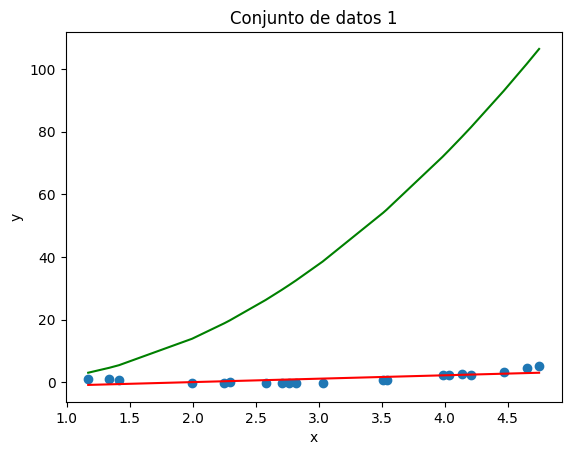

In [41]:
import matplotlib.pyplot as plt

plt.scatter(xs, ys)
plt.plot(xs, [linea(x, pars) for x in xs], color="red")
plt.plot(xs, [cuadratica(x, pars_cuad) for x in xs], color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

In [42]:
#Calculo del error relativo lineal
error_relativo = []
for i in range(len(xs)):
    error_relativo.append(abs((ys[i] - linea(xs[i], pars)) / ys[i]))

total = sum(error_relativo)/len(error_relativo)
print(total)

1.8948678846046576


In [45]:
#calculo del error relativo cuadratico
error_relativo_cuadratico = []
for i in range(len(xs)):
    error_relativo_cuadratico.append(abs((ys[i] - cuadratica(xs[i], pars_cuad)) / ys[i]))

total_cuadratico = sum(error_relativo_cuadratico)/len(error_relativo_cuadratico)
print(total_cuadratico)

67.44869699142953
